In [1]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import math
from keras.layers import Conv2D, Conv1D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import csv
from keras.utils.vis_utils import plot_model
from keras.callbacks import History, LearningRateScheduler, TensorBoard
from matplotlib import pyplot as plt
import keras
from keras import backend as K 
K.clear_session()
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
def new_dataset():
    train_data = ImageDataGenerator()
    #the dataset for face recogniton has lot of labeled faces with name of the person
    #making a new folder with all the images as one label
    j = 0

    train = train_data.flow_from_directory('lfw',target_size=(i,i), batch_size=64, shuffle= False, class_mode='categorical', save_to_dir = 'Faces\0', save_prefix = 'jpg', subset='training', seed=3)
    while(j < 207):
        train_x, train_y = train.next()
        j = j+1

In [3]:
import numpy
from PIL import Image
#creating random noise images as the second class
def add_noisy_class():
    for n in range(10000):
        a = numpy.random.rand(128, 128, 3) * 255
        im_out = Image.fromarray(a.astype('uint8')).convert('RGB')
        im_out.save('Faces/0/out%000d.jpg' % n)

In [4]:
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training = train_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


In [5]:
#taking a look at the images
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import colors, cm, pyplot as plt
import numpy as np
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off') 
        if show_labels:  
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

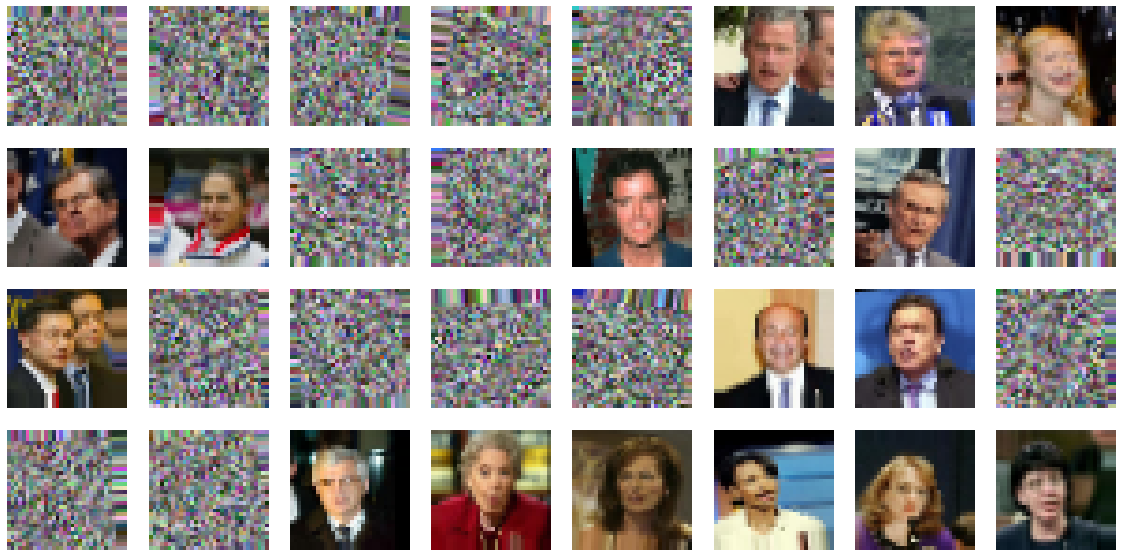

In [6]:
train_x, train_y = training.next()
show_grid(train_x,4,8,figsize=(20,10))

In [7]:
NAME = "Face_Recog_{}".format(int(time.time()))
print(NAME)
tensorboard = TensorBoard(log_dir='final\{}'.format(NAME), update_freq='epoch')

Face_Recog_1638915066


In [8]:
train_y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.], dtype=float32)

In [9]:

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True ,activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(128,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(512,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu",use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu",use_bias=True))

model.add(Dense(units=2, activation="softmax"))

opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history = History()
model.fit_generator(training, epochs=50, validation_data=test, callbacks=[tensorboard,history])

Epoch 1/50
291/291 [==============================] - 97s 332ms/step - loss: 0.1321 - accuracy: 0.9551 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 2/50
291/291 [==============================] - 91s 314ms/step - loss: 8.5931e-04 - accuracy: 0.9999 - val_loss: 3.3514e-04 - val_accuracy: 1.0000
Epoch 3/50
291/291 [==============================] - 89s 306ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/50
291/291 [==============================] - 88s 302ms/step - loss: 0.0390 - accuracy: 0.9911 - val_loss: 4.1838e-04 - val_accuracy: 0.9996
Epoch 5/50
291/291 [==============================] - 89s 307ms/step - loss: 0.0082 - accuracy: 0.9992 - val_loss: 7.5383e-05 - val_accuracy: 1.0000
Epoch 6/50
291/291 [==============================] - 89s 305ms/step - loss: 4.0099e-06 - accuracy: 1.0000 - val_loss: 1.8222e-05 - val_accuracy: 1.0000
Epoch 7/50
291/291 [==============================] - 88s 303ms/step - loss: 1.7734e-06 - accuracy: 1.0000

In [10]:
print(model.summary())
print(history.history.keys())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


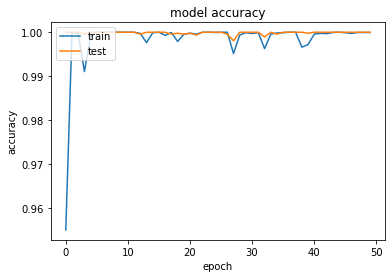

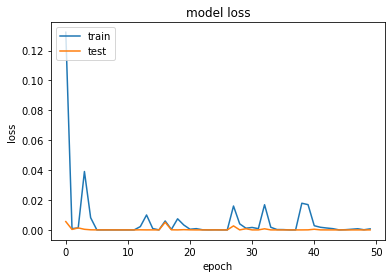

In [13]:
#plot_model(model, to_file='Face_Recog.png')
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 4646 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2646]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2646

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



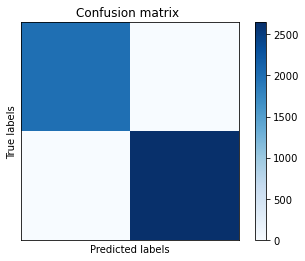

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [14]:
import csv
testp = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model.predict_generator(testp)

pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("FaceConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('face.h5')

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

In [16]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [17]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('face.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [18]:
model_m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

In [19]:
NAME = "Masked_Face_Recog_{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask\{}'.format(NAME), update_freq='epoch')

Masked_Face_Recog_1638919742


In [20]:
#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=30, validation_data=test_m, callbacks=[tensorboard_m,history_m])

Epoch 1/30
250/250 [==============================] - 466s 2s/step - loss: 0.0273 - accuracy: 0.9959 - val_loss: 0.0113 - val_accuracy: 0.9977
Epoch 2/30
250/250 [==============================] - 108s 433ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 0.9980
Epoch 3/30
250/250 [==============================] - 108s 433ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.0028 - val_accuracy: 0.9980
Epoch 4/30
250/250 [==============================] - 108s 432ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0014 - val_accuracy: 0.9980
Epoch 5/30
250/250 [==============================] - 108s 433ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 7.0998e-04 - val_accuracy: 0.9980
Epoch 6/30
250/250 [==============================] - 108s 433ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9980
Epoch 7/30
250/250 [==============================] - 109s 438ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0056 

In [21]:
print(model_m.summary())
print(history_m.history.keys())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

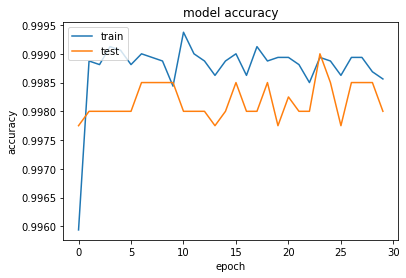

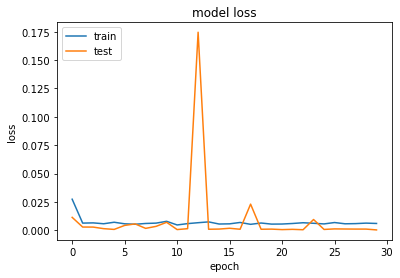

In [23]:
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model_m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

Found 4000 images belonging to 2 classes.
[[9.9929512e-01 7.0490630e-04]
 [9.9925905e-01 7.4088958e-04]
 [9.9928904e-01 7.1089383e-04]
 ...
 [2.3824153e-17 1.0000000e+00]
 [2.7929497e-12 1.0000000e+00]
 [5.0233460e-35 1.0000000e+00]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   8 1992]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



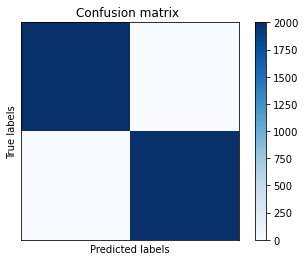

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [27]:
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('mask.h5')

In [30]:
model_m = load_model('mask.h5')
i=32
testp = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        
print(testp)
t_pred = model_m.predict_generator(testp)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)

Found 4646 images belonging to 2 classes.
[[9.9992847e-01 7.1499548e-05]
 [9.9992335e-01 7.6610057e-05]
 [9.9992752e-01 7.2422365e-05]
 ...
 [0.0000000e+00 1.0000000e+00]
 [1.0304464e-36 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2646]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2646

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



In [31]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


In [32]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('Mask.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [33]:
NAME = "Mask_and_Face_Recog_{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face\{}'.format(NAME), update_freq='epoch')

Mask_and_Face_Recog_1638925023


In [34]:
#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=30, validation_data=test_m, callbacks=[tensorboard_m,history_m])

Epoch 1/30
291/291 [==============================] - 126s 431ms/step - loss: 1.1410 - accuracy: 0.5643 - val_loss: 0.7161 - val_accuracy: 0.4845
Epoch 2/30
291/291 [==============================] - 118s 404ms/step - loss: 0.8081 - accuracy: 0.5965 - val_loss: 0.8035 - val_accuracy: 0.4305
Epoch 3/30
291/291 [==============================] - 120s 412ms/step - loss: 0.7987 - accuracy: 0.6053 - val_loss: 0.6201 - val_accuracy: 0.6354
Epoch 4/30
291/291 [==============================] - 120s 411ms/step - loss: 0.7011 - accuracy: 0.6283 - val_loss: 0.7428 - val_accuracy: 0.4305
Epoch 5/30
291/291 [==============================] - 120s 413ms/step - loss: 0.7147 - accuracy: 0.6227 - val_loss: 0.6938 - val_accuracy: 0.5129
Epoch 6/30
291/291 [==============================] - 119s 409ms/step - loss: 0.7208 - accuracy: 0.6258 - val_loss: 0.6445 - val_accuracy: 0.5168
Epoch 7/30
291/291 [==============================] - 119s 409ms/step - loss: 0.7036 - accuracy: 0.6317 - val_loss: 0.7759 -

In [35]:
print(model_m.summary())
print(history_m.history.keys())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

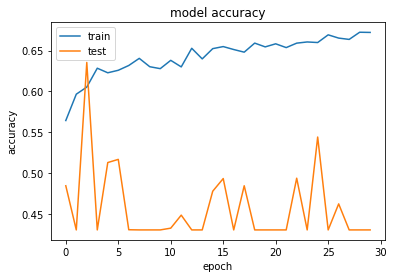

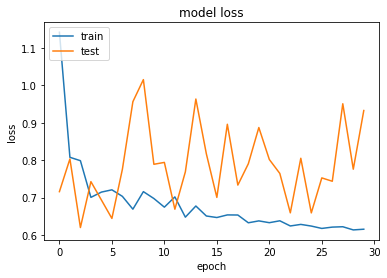

In [36]:
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 4646 images belonging to 2 classes.
[[0.33068773 0.66931224]
 [0.28155413 0.7184459 ]
 [0.3001513  0.69984865]
 ...
 [0.27072194 0.7292781 ]
 [0.25819087 0.74180907]
 [0.31025234 0.68974763]]
[1 1 1 ... 1 1 1]
Confusion Matrix
[[   0 2646]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2646
           1       0.43      1.00      0.60      2000

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

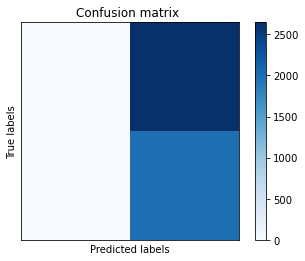

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [37]:
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('maskAndFace.h5')

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Mask_and_Face_Recog_v21638929836
Epoch 1/30
291/291 [==============================] - 125s 429ms/step - loss: 1.2153 - accuracy: 0.5540 - val_loss: 0.8182 - val_accuracy: 0.4305
Epoch 2/30
291/291 [==============================] - 124s 425ms/step - loss: 0.7631 - accuracy: 0.6012 - val_loss: 0.7124 - val_accuracy: 0.4486
Epoch 3/30
291/291 [==============================] - 127s 436ms/step - loss: 0.6933 - accuracy: 0.6274 - val_loss: 0.8800 - val_accuracy: 0.4305
Epoch 4/30
291/291 [==============================] - 139s 476ms/step - loss: 0.7414 - accuracy: 0.6207 - val_loss: 0.6456 - val_accuracy: 0.4673
Epoch 5/30
291/291 [==============================] - 2701s 9s/step - loss: 0.6862 - accuracy: 0.6342 - val_loss: 0.9834 - val_accuracy: 0.4305
Epoch 6/30
291/291 [==============================] - 120s 414ms/step - loss: 0.6885 - accuracy: 0.6342 - val_loss: 0.9606 - val_accuracy: 0.4305
Epoch 7/30
291/291 [==============================] - 122s 420ms/step - loss: 0.7006 - accura

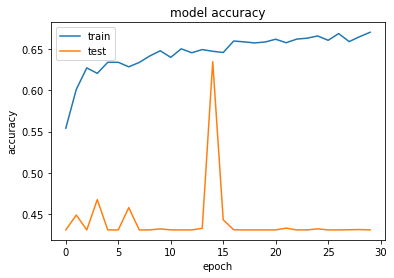

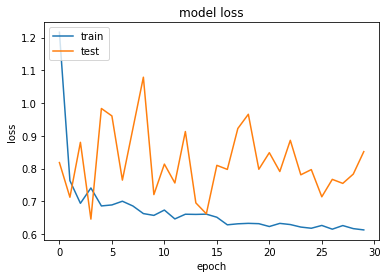

Found 4646 images belonging to 2 classes.


ValueError: Error when checking input: expected conv2d_1_input to have shape (32, 32, 3) but got array with shape (1, 1, 3)

In [38]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('Face.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

NAME = "Mask_and_Face_Recog_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_v2\{}'.format(NAME), update_freq='epoch')

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=30, validation_data=test_m, callbacks=[tensorboard_m,history_m])

print(model_m.summary())
print(history_m.history.keys())

#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Found 4646 images belonging to 2 classes.
[[0.31147248 0.6885275 ]
 [0.27067015 0.7293298 ]
 [0.2847393  0.7152607 ]
 ...
 [0.2613377  0.73866224]
 [0.2511784  0.7488215 ]
 [0.29271412 0.7072859 ]]
[1 1 1 ... 1 1 1]
Confusion Matrix
[[   0 2646]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2646
           1       0.43      1.00      0.60      2000

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

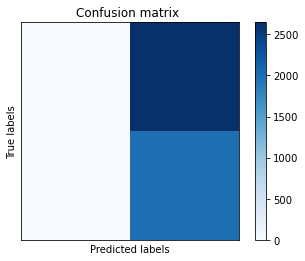

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [39]:
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('maskAndFacev2.h5')

<h1> Train with masked face trained model, unfreez even layers </h1>

In [51]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


In [53]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('Mask.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
count = 0
for layer in model_m.layers[:-2]:
    count = count + 1
    if count%2 == 0:
        layer.trainable = False

In [54]:
NAME = "Mask_and_Face_Recog_even{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_even\{}'.format(NAME), update_freq='epoch')

Mask_and_Face_Recog_even1638950415


In [55]:
#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=30, validation_data=test_m, callbacks=[tensorboard_m,history_m])

Epoch 1/30
291/291 [==============================] - 130s 446ms/step - loss: 0.6976 - accuracy: 0.6503 - val_loss: 0.5774 - val_accuracy: 0.5930
Epoch 2/30
291/291 [==============================] - 131s 449ms/step - loss: 0.0784 - accuracy: 0.9736 - val_loss: 0.1513 - val_accuracy: 0.9346
Epoch 3/30
291/291 [==============================] - 134s 460ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0183 - val_accuracy: 0.9968
Epoch 4/30
291/291 [==============================] - 136s 468ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0174 - val_accuracy: 0.9957
Epoch 5/30
291/291 [==============================] - 142s 488ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 6/30
291/291 [==============================] - 138s 475ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0306 - val_accuracy: 0.9983
Epoch 7/30
291/291 [==============================] - 148s 508ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0323 -

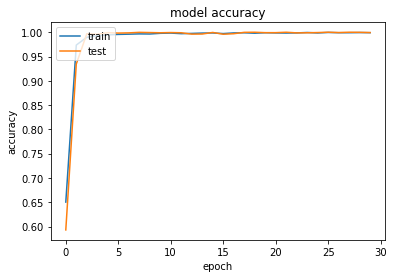

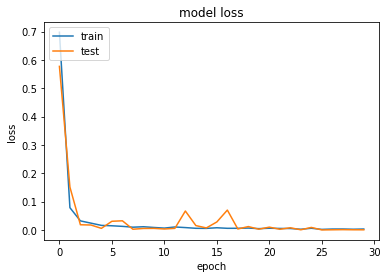

In [56]:
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 4646 images belonging to 2 classes.
[[1.0000000e+00 2.5912660e-13]
 [9.9992383e-01 7.6162942e-05]
 [1.0000000e+00 3.6222891e-12]
 ...
 [6.6223582e-03 9.9337763e-01]
 [1.6382484e-03 9.9836177e-01]
 [1.9364625e-02 9.8063540e-01]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2646    0]
 [   3 1997]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2646
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



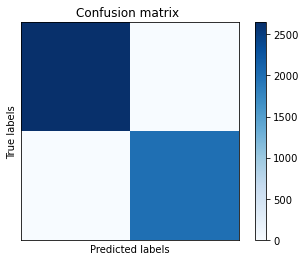

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [57]:
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskFaceeven.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('maskAndFacev3_even.h5')

Found 4646 images belonging to 2 classes.
[[9.9973494e-01 2.6503991e-04]
 [9.9951327e-01 4.8678272e-04]
 [9.9954307e-01 4.5691611e-04]
 ...
 [9.9993336e-01 6.6625798e-05]
 [9.9991071e-01 8.9300411e-05]
 [9.9999928e-01 6.7575547e-07]]
[0 0 0 ... 0 0 0]
Confusion Matrix
[[2000    0]
 [2646    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      2000
           1       0.00      0.00      0.00      2646

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

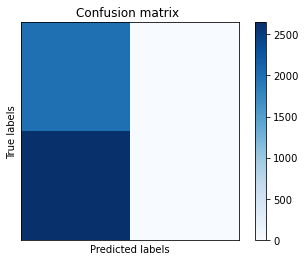

In [58]:
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

Found 4000 images belonging to 2 classes.
[[9.9973494e-01 2.6503991e-04]
 [9.9951327e-01 4.8678272e-04]
 [9.9954307e-01 4.5691611e-04]
 ...
 [6.6223582e-03 9.9337763e-01]
 [1.6382484e-03 9.9836177e-01]
 [1.9364625e-02 9.8063540e-01]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   3 1997]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



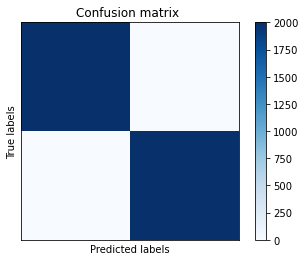

In [59]:
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [40]:
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training = train_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test = test_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


In [41]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True ,activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(128,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(512,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu",use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu",use_bias=True))

model.add(Dense(units=2, activation="softmax"))

opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history = History()
model.fit_generator(training, epochs=50, validation_data=test, callbacks=[tensorboard,history])

Epoch 1/50
291/291 [==============================] - 126s 434ms/step - loss: 0.0980 - accuracy: 0.9507 - val_loss: 0.0129 - val_accuracy: 0.9989
Epoch 2/50
291/291 [==============================] - 128s 440ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0285 - val_accuracy: 0.9981
Epoch 3/50
291/291 [==============================] - 139s 476ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0727 - val_accuracy: 0.9910
Epoch 4/50
291/291 [==============================] - 135s 465ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 5/50
291/291 [==============================] - 134s 459ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 6.4453e-04 - val_accuracy: 0.9996
Epoch 6/50
291/291 [==============================] - 136s 467ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7/50
291/291 [==============================] - 140s 481ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.00

Found 4646 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2646    0]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2646
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



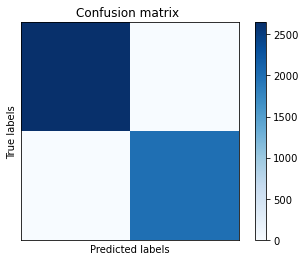

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [72]:
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

index = 0
image_names = []
while (index < 4646):
    image, label = testp_m._get_batches_of_transformed_samples(np.array([index]))
    image_names.append(testp_m.filenames[index])
    index = index + 1

t_pred = model.predict_generator(testp_m)
pred = np.argmax(t_pred, axis=1)
print(pred)

index = 0
non_masked_faces = []
while(index < 4646):
    if(pred[index] == 0):
        non_masked_faces.append(image_names[index])
    index = index + 1
    
    
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf_newmodel.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('maskAndFace_new_model.h5')

In [73]:
non_masked_faces

['0/jpg_0_3230391.png',
 '0/jpg_10000_9363241.png',
 '0/jpg_10001_8939282.png',
 '0/jpg_10002_722733.png',
 '0/jpg_10003_3894769.png',
 '0/jpg_10004_4100323.png',
 '0/jpg_10005_9271509.png',
 '0/jpg_10006_6431713.png',
 '0/jpg_10007_3935050.png',
 '0/jpg_10008_6441331.png',
 '0/jpg_10009_3708505.png',
 '0/jpg_1000_5799212.png',
 '0/jpg_10010_3747444.png',
 '0/jpg_10011_9322988.png',
 '0/jpg_10012_1938002.png',
 '0/jpg_10013_8276789.png',
 '0/jpg_10014_7351355.png',
 '0/jpg_10015_6178067.png',
 '0/jpg_10016_959301.png',
 '0/jpg_10017_8596973.png',
 '0/jpg_10018_5012211.png',
 '0/jpg_10019_815273.png',
 '0/jpg_1001_8162428.png',
 '0/jpg_10020_9358674.png',
 '0/jpg_10021_4686274.png',
 '0/jpg_10022_6649991.png',
 '0/jpg_10023_2874935.png',
 '0/jpg_10024_6378268.png',
 '0/jpg_10025_3423635.png',
 '0/jpg_10026_9563656.png',
 '0/jpg_10027_1281224.png',
 '0/jpg_10028_2357237.png',
 '0/jpg_10029_9543164.png',
 '0/jpg_1002_6570410.png',
 '0/jpg_10030_8375964.png',
 '0/jpg_10031_4690819.png',
 '

Found 4646 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
[0 0 0 ... 0 0 0]
Confusion Matrix
[[2000    0]
 [2646    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      2000
           1       0.00      0.00      0.00      2646

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

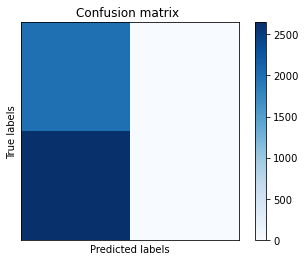

In [49]:
#testing mask and face model with face data only
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model.predict_generator(testp_m)
print(testp_m.classes)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

Found 4000 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



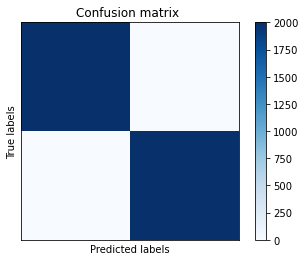

In [70]:
#testing mask and face model with masked faces data only
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        



t_pred = model.predict_generator(testp_m)
pred = np.argmax(t_pred, axis=1)
print(pred)


print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

['0/out0.jpg',
 '0/out1.jpg',
 '0/out10.jpg',
 '0/out100.jpg',
 '0/out1000.jpg',
 '0/out1001.jpg',
 '0/out1002.jpg',
 '0/out1003.jpg',
 '0/out1004.jpg',
 '0/out1005.jpg',
 '0/out1006.jpg',
 '0/out1007.jpg',
 '0/out1008.jpg',
 '0/out1009.jpg',
 '0/out101.jpg',
 '0/out1010.jpg',
 '0/out1011.jpg',
 '0/out1012.jpg',
 '0/out1013.jpg',
 '0/out1014.jpg',
 '0/out1015.jpg',
 '0/out1016.jpg',
 '0/out1017.jpg',
 '0/out1018.jpg',
 '0/out1019.jpg',
 '0/out102.jpg',
 '0/out1020.jpg',
 '0/out1021.jpg',
 '0/out1022.jpg',
 '0/out1023.jpg',
 '0/out1024.jpg',
 '0/out1025.jpg',
 '0/out1026.jpg',
 '0/out1027.jpg',
 '0/out1028.jpg',
 '0/out1029.jpg',
 '0/out103.jpg',
 '0/out1030.jpg',
 '0/out1031.jpg',
 '0/out1032.jpg',
 '0/out1033.jpg',
 '0/out1034.jpg',
 '0/out1035.jpg',
 '0/out1036.jpg',
 '0/out1037.jpg',
 '0/out1038.jpg',
 '0/out1039.jpg',
 '0/out104.jpg',
 '0/out1040.jpg',
 '0/out1041.jpg',
 '0/out1042.jpg',
 '0/out1043.jpg',
 '0/out1044.jpg',
 '0/out1045.jpg',
 '0/out1046.jpg',
 '0/out1047.jpg',
 '0/o

In [83]:
# GRADED FUNCTION: triplet_loss
import tensorflow as tf
def triplet_loss(y_true, y_pred, alpha = 0.2):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    ### START CODE HERE ### (≈ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis = -1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis = -1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = pos_dist- neg_dist + alpha
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    ### END CODE HERE ###
    
    return loss

In [250]:
model = load_model('maskAndFace_new_model.h5')
model = keras.models.Sequential(model.layers[:-2])
opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = triplet_loss, metrics= ["accuracy"])

In [118]:
def img_to_encoding(path, model):
    img = cv2.imread(path, 1)
    #img = img1[...,::-1]
    dim = (32, 32)
    # resize image
    if(img.shape != (32, 32, 3)):
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    x_train = np.array([img])
    embedding = model.predict(x_train)
    return embedding

In [243]:
import os
all_images_embeded = {}
all_files = []
dir_list = []
index = 0
for root, dirs, files in os.walk('database'):
    dir_list = dirs
    if index == 0:
        break
print(dir_list)

['German_Khan', 'Stefano_Gabbana', 'Dragan_Covic', 'Jeff_Hornacek', 'Sureyya_Ayhan', 'Deb_Santos', 'Bob_Newhart', 'Wang_Hailan', 'Paul_McNulty', 'Jimmy_Iovine', 'Claudia_Pechstein', 'Ranil_Wickremasinghe', 'Ben_Chandler', 'Mark_Komara', 'Rand_Beers', 'Joanne_Woodward', 'John_Bond', 'Reginald_Hudlin', 'Lee_Baca', 'Mary-Kate_Olsen', 'Emily_Stevens', 'Xiang_Huaicheng', 'Phil_Mickelson', 'Gerry_Kelly', 'Salma_Hayek', 'Jim_Edmonds', 'Martina_McBride', 'Anthony_Pico', 'Jose_Theodore', 'Heidi_Fleiss', 'Mark_Richt', 'Mike_Smith', 'Paul_ONeill', 'Horace_Newcomb', 'Mohammad_Fares', 'JK_Rowling', 'Shinya_Taniguchi', 'Tony_Curtis', 'Laurie_Pirtle', 'Angel_Maza', 'Ray_Sherman', 'Nancy_Powell', 'Kathryn_Tucker', 'Gro_Harlem_Brundtland', 'Jacqueline_Marris', 'Mikhail_Gorbachev', 'Takuma_Sato', 'Ray_Lewis', 'Hank_Aaron', 'Chip_Knight', 'Tracee_Treadwell', 'Ronald_Young_Jr', 'Gustavo_Cisneros', 'Jack_Osbourne', 'Isidro_Pastor', 'Mike_Duke', 'Natalie_Williams', 'Angela_Lansbury', 'Cathy_Freeman', 'Milt_

In [227]:
conda install glob2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/chandrikasaha/opt/anaconda3/envs/tf_keras

  added / updated specs:
    - glob2


The following NEW packages will be INSTALLED:

  glob2              pkgs/main/noarch::glob2-0.7-pyhd3eb1b0_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [234]:
import glob

all_paths = glob.glob("/Users/chandrikasaha/Desktop/MLproject/ML/database/*/*.jpg")
print(all_paths)

['/Users/chandrikasaha/Desktop/MLproject/ML/database/German_Khan/German_Khan_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Stefano_Gabbana/Stefano_Gabbana_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Dragan_Covic/Dragan_Covic_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Jeff_Hornacek/Jeff_Hornacek_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Sureyya_Ayhan/Sureyya_Ayhan_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Deb_Santos/Deb_Santos_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Bob_Newhart/Bob_Newhart_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Wang_Hailan/Wang_Hailan_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Paul_McNulty/Paul_McNulty_0002.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Paul_McNulty/Paul_McNulty_0001.jpg', '/Users/chandrikasaha/Desktop/MLproject/ML/database/Jimmy_Iovine/Jimmy_Iovine_0001.jpg', '/Users/chandrikasah

In [252]:
index = 0
all_images_embeded = {}
for dirs in dir_list:
    all_images_embeded[dirs] = img_to_encoding(all_paths[index], model)
    index = index + 1

In [253]:
all_images_embeded

{'German_Khan': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Stefano_Gabbana': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Dragan_Covic': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Jeff_Hornacek': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Sureyya_Ayhan': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Deb_Santos': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Bob_Newhart': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Wang_Hailan': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Paul_McNulty': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Jimmy_Iovine': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Claudia_Pechstein': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Ranil_Wickremasinghe': array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32),
 'Ben_Chandler': array([[-0., -0., -0., ..., -0., -

In [260]:
import cv2
def who_is_it(image_path, database, model):
    image_path = 'MaskFace/' + image_path
    encoding = img_to_encoding(image_path, model)
    min_dist = 1000
    identity = 'Not in database'
    #Looping over the names and encodings in the database.
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(encoding-db_enc)
        if dist < min_dist:
            min_dist = dist
            identity = name
    if min_dist > 100:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    return min_dist, identity


In [261]:
for faces in non_masked_faces:
    who_is_it( faces, all_images_embeded, model)

it's Michael_Munoz, the distance is 44.818436
it's Aline_Chretien, the distance is 34.45712
it's Charles_Tannok, the distance is 91.66759
it's Jackie_Dennis, the distance is 36.486687
it's Robert_Tyrrell, the distance is 25.07796
it's Gil_Cates, the distance is 50.730568
it's Raul_Ibanez, the distance is 20.463703
it's Zhong_Nanshan, the distance is 34.488533
it's Corey_Maggette, the distance is 24.080528
it's Joan_Dangerfield, the distance is 24.268806
it's Janet_Horvath, the distance is 6.2409873
it's Jimmy_Szymanski, the distance is 9.7033
Not in the database.
it's Sharon_Stone, the distance is 15.949526
it's Steve_Alford, the distance is 30.974934
it's Sue_Slavec, the distance is 18.754528
it's Tono_Suratman, the distance is 59.7317
it's Askar_Akayev, the distance is 83.84324
it's Tara_Kirk, the distance is 58.67882
it's Steve_Alford, the distance is 50.649487
it's Rick_Rickert, the distance is 28.185131
Not in the database.
it's Maria_Bello, the distance is 75.203964
it's Surya_Ba

it's Kirk_Ferentz, the distance is 18.488726
it's Guy_Ritchie, the distance is 22.624458
it's Jose_Lina, the distance is 43.51133
it's Guillermo_Canas, the distance is 62.913956
it's John_Lynch, the distance is 27.44574
it's Robert_Bonner, the distance is 46.58546
it's Katie_Holmes, the distance is 15.2953825
it's Eddy_Hartenstein, the distance is 10.703067
it's Akhmed_Zakayev, the distance is 18.406359
it's Pedro_Pauleta, the distance is 20.384275
it's Tim_Conway, the distance is 1.8784175
it's Hugh_Grant, the distance is 22.991596
it's Tony_Blair, the distance is 15.63362
it's Brian_De_Palma, the distance is 30.069597
Not in the database.
it's Dan_Snyder, the distance is 44.377243
it's Melissa_Etheridge, the distance is 65.38175
it's Li_Peng, the distance is 2.8496659
it's Kim_Jong-Il, the distance is 3.688869
it's Alastair_Johnston, the distance is 29.572048
it's Julia_Glass, the distance is 46.325565
it's Penelope_Cruz, the distance is 22.108522
it's Mark_Shapiro, the distance is 2

Not in the database.
it's Shanna_Zolman, the distance is 30.490898
it's Gerald_Riley, the distance is 15.495724
it's Cosmo_Iacavazzi, the distance is 27.852167
it's Robert_Wagner, the distance is 25.005495
it's Renato_Soru, the distance is 27.291235
it's Spencer_Abraham, the distance is 37.752335
it's Juan_Ignacio_Chela, the distance is 34.034206
it's Cemil_Cicek, the distance is 12.285112
it's Alvaro_Uribe, the distance is 34.370953
it's Hamid_Reza_Asefi, the distance is 17.911123
it's Annie_Chaplin, the distance is 53.19778
it's Thomas_Wilkens, the distance is 27.486027
it's Michelle_Pfeiffer, the distance is 10.636652
it's Bruce_Lunsford, the distance is 12.4774885
it's Kelli_White, the distance is 18.078787
it's Tyrone_Medley, the distance is 26.498314
it's Bill_Parcells, the distance is 59.886524
it's Zafarullah_Khan_Jamali, the distance is 35.51292
it's Roger_King, the distance is 29.165205
it's Patty_Duke, the distance is 27.223604
it's Miranda_Gaddis, the distance is 15.685691


it's Estelle_Morris, the distance is 28.849386
it's Warren_Granados, the distance is 19.5277
Not in the database.
it's Valeri_Bure, the distance is 25.951035
it's Frank_Keating, the distance is 33.3758
it's Frederique_van_der_Wal, the distance is 61.73182
Not in the database.
it's Rachel_Griffiths, the distance is 89.598564
it's Tamara_Stokes, the distance is 25.653952
it's Dave_McGinnis, the distance is 27.160814
it's Abdoulaye_Wade, the distance is 27.578405
it's Gregory_Hines, the distance is 37.101734
it's Charles_Taylor, the distance is 54.55438
it's Kitin_Munoz, the distance is 24.692266
it's Janet_Thorpe, the distance is 26.660788
it's Giulietta_Masina, the distance is 30.723495
it's Russell_Coutts, the distance is 43.992825
it's Thomas_Mesereau_Jr, the distance is 10.737162
it's Dan_Quayle, the distance is 4.0286803
it's Diego_Armando_Maradona, the distance is 23.910295
it's Sung_Hong_Choi, the distance is 36.610252
it's Eric_Lloyd, the distance is 86.10072
it's Richard_Rodrigu

it's Oliver_Neuville, the distance is 29.363161
it's Boris_Henry, the distance is 46.635384
it's Melissa_Joan_Hart, the distance is 11.319945
it's Desmon_Farmer, the distance is 59.449406
it's Ronnie_Jagday, the distance is 6.2394075
it's Chris_Claiborne, the distance is 53.75338
it's Sharon_Osbourne, the distance is 11.878752
it's William_Bulger, the distance is 34.567875
it's Grant_Hackett, the distance is 18.060503
it's Ted_Washington, the distance is 16.273777
Not in the database.
it's Ramiro_Goben_Reducindo, the distance is 40.09005
it's John_Prescott, the distance is 67.538704
it's Jim_Sterk, the distance is 22.640997
it's Chuck_Eidson, the distance is 24.407646
it's Nicoletta_Braschi, the distance is 74.00282
it's Hedayat_Amin_Arsala, the distance is 44.953346
it's David_Przybyszewski, the distance is 60.802628
it's Miguel_Angel_Rodriguez, the distance is 35.86898
it's Anthony_Pisciotti, the distance is 62.236862
it's Steny_Hoyer, the distance is 25.743689
it's Steven_Feldman, t

it's Franz_Fischler, the distance is 20.99921
it's Lou_Reed, the distance is 54.409073
it's Edward_Lohn, the distance is 24.727339
it's Cesar_Maia, the distance is 21.550697
it's Tzipora_Obziler, the distance is 61.38892
it's Cristina_Saralegui, the distance is 19.723667
it's Stockard_Channing, the distance is 23.67694
it's Jennette_Bradley, the distance is 8.76522
it's Nicolas_Latorre, the distance is 49.82223
it's Dionne_Warwick, the distance is 24.970171
it's Dirk_Kempthorne, the distance is 41.671375
it's Joe_Metz, the distance is 29.160727
it's Bison_Dele, the distance is 30.01764
it's Bob_Wright, the distance is 32.431297
it's Sebastian_Porto, the distance is 36.47245
it's Tsutomu_Takebe, the distance is 17.784645
it's Stella_McCartney, the distance is 94.927376
it's Amy_Smart, the distance is 20.360506
it's Tocker_Pudwill, the distance is 31.470545
Not in the database.
it's Leslie_Ann_Woodward, the distance is 39.182156
it's Steve_Fehr, the distance is 21.159212
Not in the datab

it's Charlize_Theron, the distance is 8.687205
it's Owen_Nolan, the distance is 62.327362
it's Eglis_Yaima_Cruz, the distance is 34.59268
it's Brad_Garrett, the distance is 55.0614
it's Mario_Alfaro-Lopez, the distance is 33.26551
it's James_Kirtley, the distance is 35.063774
it's Britney_Spears, the distance is 87.59447
it's Ismael_Miranda, the distance is 14.176264
it's James_Collinson, the distance is 9.29176
it's Joseph_Kabila, the distance is 10.100604
it's James_Traficant, the distance is 42.065506
it's Al_Davis, the distance is 37.749447
it's David_Montoya, the distance is 35.62706
it's Jim_Leach, the distance is 38.555405
it's Thomas_Rupprath, the distance is 67.54804
it's Jean-Claude_Van_Damme, the distance is 22.810957
it's Ray_Lucas, the distance is 29.126154
it's Seydou_Diarra, the distance is 39.938343
it's Abdel_Madi_Shabneh, the distance is 4.2828035
it's Paul_Pierce, the distance is 22.904684
it's Natalie_Juniardi, the distance is 31.034052
it's Christine_Gregoire, the 

it's Shigeo_Nagashima, the distance is 38.32749
it's Martin_Bandier, the distance is 18.875996
it's Mikhail_Shvydkoi, the distance is 16.576122
it's Paddy_Torsney, the distance is 25.624392
it's Brian_McIntyre, the distance is 35.391785
it's Abdel_Nasser_Assidi, the distance is 32.03753
it's Bryant_Young, the distance is 23.220898
it's Quincy_Jones, the distance is 22.58236
it's Martina_Hingis, the distance is 55.613358
it's Mae_Jemison, the distance is 52.15036
it's Albaro_Recoba, the distance is 32.16797
it's LeRoy_Millette_Jr, the distance is 22.129068
it's Troy_Garity, the distance is 13.991862
it's Mickey_Loomis, the distance is 38.79424
it's Antanas_Valionis, the distance is 74.64763
it's Atom_Egoyan, the distance is 16.452965
it's Kurt_Budke, the distance is 19.358053
it's Franklin_Damann, the distance is 23.451895
it's Philip_Zalewski, the distance is 34.189533
it's Philip_Cummings, the distance is 23.424402
it's Magui_Serna, the distance is 30.59009
it's Paul_Henderson, the di

it's Diego_Diego_Lerman, the distance is 26.763796
it's Tamara_Brooks, the distance is 31.163548
it's Leonardo_Fernandez, the distance is 27.589378
it's Paul_Murphy, the distance is 24.466267
it's Sebastian_Porto, the distance is 32.550705
it's Prince_Harry, the distance is 32.077248
it's Nicholas_Byron, the distance is 1.8872932
it's Steve_Shiver, the distance is 27.975828
it's Joshua_Davey, the distance is 45.151493
it's Bobby_Robson, the distance is 59.972736
it's Herman_Moore, the distance is 37.781147
it's Rodrigo_Rato, the distance is 52.852886
it's Nestor_Gonzalez, the distance is 26.421587
it's Gideon_Yago, the distance is 11.95198
it's Brennon_Leighton, the distance is 26.504787
it's Stipe_Mesic, the distance is 23.675842
it's Mark_Philippoussis, the distance is 30.343388
it's Khalid_Khannouchi, the distance is 42.244667
it's Thomas_Birmingham, the distance is 1.7905873
it's Guillermo_Coria, the distance is 18.146112
it's Norman_Jewison, the distance is 20.68016
it's Bernard_L

it's Mark_Shapiro, the distance is 18.200623
it's Dan_Boyle, the distance is 19.227108
it's Valentina_Cervi, the distance is 17.16145
it's Bixente_LIzarazu, the distance is 16.122948
it's Elinor_Caplan, the distance is 40.09052
it's Mahdi_Al_Bassam, the distance is 52.114826
it's Quin_Snyder, the distance is 40.356197
it's Ben_Betts, the distance is 34.246815
it's Ellen_Barkin, the distance is 44.9633
it's Michelle_Collins, the distance is 19.281363
it's Mike_Tice, the distance is 20.050749
it's Teresa_Worbis, the distance is 32.00644
it's Patrick_Ewing, the distance is 23.835814
it's Fred_Durst, the distance is 19.294138
it's Reyyan_Uzuner, the distance is 34.614586
it's Jimmy_Iovine, the distance is 17.144115
it's Buzz_Hargrove, the distance is 26.80101
it's Prince_Philippe, the distance is 43.96112
it's Edward_Burns, the distance is 22.733458
it's Tim_Duncan, the distance is 18.058079
it's Bill_Hughes, the distance is 36.9674
it's Paddy_Long, the distance is 44.344772
it's Simon_Yam

it's Jim_Cantalupo, the distance is 17.225143
it's Jacques_Rogge, the distance is 14.318476
it's John_Jumper, the distance is 32.33141
it's Calbert_Cheaney, the distance is 18.708223
it's Jolanta_Kwasniewski, the distance is 30.608587
it's Ann_Godbehere, the distance is 14.774423
it's Valerie_Harper, the distance is 1.6793861
it's Matthew_Broderick, the distance is 28.2753
Not in the database.
it's Robert_Nardelli, the distance is 10.839504
it's Alan_Greer, the distance is 44.147022
it's John_Rowland, the distance is 23.000448
it's Dirk_Kempthorne, the distance is 19.251131
it's Audrey_Sauret, the distance is 39.80854
it's Etta_James, the distance is 12.731655
it's Bilal_Erdogan, the distance is 37.942055
it's Millicent_Martin, the distance is 52.55434
it's Alistair_MacDonald, the distance is 34.52417
it's Mark_Redman, the distance is 15.812606
it's Victoria_Clarke, the distance is 11.866173
it's Wesley_Clark, the distance is 19.73997
it's Mary_Bono, the distance is 50.02117
it's Eliza

it's Jason_Campbell, the distance is 35.228413
it's Bianca_Jagger, the distance is 17.9321
it's Tatsuya_Fuji, the distance is 38.81872
it's Hamad_Bin_Jassim, the distance is 18.649662
it's Bode_Miller, the distance is 97.11656
it's Kate_Moss, the distance is 30.47294
it's John_Eder, the distance is 27.448917
it's Terry_Hoeppner, the distance is 65.672264
it's Celso_Lafer, the distance is 16.139725
it's Gianni_Agnelli, the distance is 36.240322
it's Pedro_Alvarez, the distance is 27.805655
it's Heather_Whitestone_McCallum, the distance is 22.050507
it's Mauricio_Macri, the distance is 29.249817
it's Natalie_Maines, the distance is 33.37433
it's Carlton_Baugh, the distance is 33.735012
it's Billy_Tibbets, the distance is 19.849287
it's Fidel_Castro, the distance is 25.595482
it's Jodie_Henry, the distance is 59.901577
it's Bill_Maher, the distance is 38.555405
it's Adam_Rich, the distance is 31.834726
it's Mohammad_Hasanein, the distance is 29.805496
it's Judy_Genshaft, the distance is 1

it's Donna_Walker, the distance is 18.260252
it's David_Hilt, the distance is 47.436096
it's Brad_Johnson, the distance is 16.830063
it's Jerry_Angelo, the distance is 65.40771
it's Mitchell_Crooks, the distance is 26.176922
it's Magdalena_Maleeva, the distance is 26.602903
it's Baz_Luhrmann, the distance is 83.76999
it's Marion_Barry, the distance is 31.707485
it's Jeremy_Wotherspoon, the distance is 2.9457955
it's Shania_Twain, the distance is 44.177757
it's Raymond_Arthurs, the distance is 63.97759
it's Lauren_Killian, the distance is 17.656084
it's Shane_Warne, the distance is 14.443132
it's Roberta_Combs, the distance is 16.885693
it's Anne_Donovan, the distance is 31.445578
it's Jose_Cevallos, the distance is 21.192312
it's Stella_Keitel, the distance is 69.79361
it's Angela_Alvarado_Rosa, the distance is 38.286633
Not in the database.
it's Jim_Otto, the distance is 14.47271
it's Scott_Blum, the distance is 8.123153
it's Morgan_Freeman, the distance is 24.062668
it's Ana_Paula_Ge

it's Robert_Nillson, the distance is 51.446148
it's Kaisser_Bazan, the distance is 23.65843
it's Earl_Counter, the distance is 34.443146
it's Phil_Gramm, the distance is 10.207087
it's Nina_Jacobson, the distance is 67.41975
it's Lene_Espersen, the distance is 32.565125
it's Joe_Glover, the distance is 21.205193
it's Manuel_Llorente, the distance is 34.025894
it's Gerry_Parsky, the distance is 21.277859
it's Ian_Moran, the distance is 24.675005
it's Deb_Santos, the distance is 39.63252
it's Helena_Schneider, the distance is 52.263973
it's Turner_Gill, the distance is 15.206628
it's John_Elway, the distance is 54.078632
it's Anneli_Jaatteenmaki, the distance is 75.68036
it's Randy_Brown, the distance is 41.85015
it's Hushiar_Zebari, the distance is 18.233133
it's Rogelio_Ramos, the distance is 57.62765
it's Festus_Mogae, the distance is 21.308308
it's Lawrence_Di_Rita, the distance is 38.238255
it's Mitzi_Gaynor, the distance is 33.764294
Not in the database.
it's Daniel_Montgomery, the

it's Manuela_Montebrun, the distance is 17.31261
it's Kay_Bailey_Hutchison, the distance is 65.72463
it's Rich_Gannon, the distance is 32.508087
it's Bob_Cantrell, the distance is 23.946632
it's Larry_Bowa, the distance is 40.763218
it's Charles_Tannok, the distance is 98.21213
it's Hayden_Panettiere, the distance is 30.84056
it's Izzat_Ibrahim, the distance is 44.042458
it's LK_Advani, the distance is 24.31903
it's Dusty_Baker, the distance is 23.057646
it's Yogi_Berra, the distance is 29.639301
it's Carlos_Ruiz, the distance is 38.499275
it's Stan_Kroenke, the distance is 16.95781
it's Yogi_Berra, the distance is 23.54599
it's Leslie_Ann_Woodward, the distance is 27.35672
it's Erika_Christensen, the distance is 21.322872
it's Hannah_Stockbauer, the distance is 25.038416
it's Rainer_Schuettler, the distance is 24.654415
it's Diego_Diego_Lerman, the distance is 29.447092
it's Earl_Fritts, the distance is 44.629578
it's Manuel_Jesus, the distance is 31.234896
it's Michael_Dell, the dist

In [255]:
non_masked_faces

['0/jpg_0_3230391.png',
 '0/jpg_10000_9363241.png',
 '0/jpg_10001_8939282.png',
 '0/jpg_10002_722733.png',
 '0/jpg_10003_3894769.png',
 '0/jpg_10004_4100323.png',
 '0/jpg_10005_9271509.png',
 '0/jpg_10006_6431713.png',
 '0/jpg_10007_3935050.png',
 '0/jpg_10008_6441331.png',
 '0/jpg_10009_3708505.png',
 '0/jpg_1000_5799212.png',
 '0/jpg_10010_3747444.png',
 '0/jpg_10011_9322988.png',
 '0/jpg_10012_1938002.png',
 '0/jpg_10013_8276789.png',
 '0/jpg_10014_7351355.png',
 '0/jpg_10015_6178067.png',
 '0/jpg_10016_959301.png',
 '0/jpg_10017_8596973.png',
 '0/jpg_10018_5012211.png',
 '0/jpg_10019_815273.png',
 '0/jpg_1001_8162428.png',
 '0/jpg_10020_9358674.png',
 '0/jpg_10021_4686274.png',
 '0/jpg_10022_6649991.png',
 '0/jpg_10023_2874935.png',
 '0/jpg_10024_6378268.png',
 '0/jpg_10025_3423635.png',
 '0/jpg_10026_9563656.png',
 '0/jpg_10027_1281224.png',
 '0/jpg_10028_2357237.png',
 '0/jpg_10029_9543164.png',
 '0/jpg_1002_6570410.png',
 '0/jpg_10030_8375964.png',
 '0/jpg_10031_4690819.png',
 '